# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# File to Load 
city_weather_to_load = "cities.csv"

# Read the weather data 
def create_df(file):
    path = os.path.join(file)
    return pd.read_csv(path, index_col=0)
    
weather_df = create_df(city_weather_to_load)

In [3]:
#Convert temperature data to Fahrenheit 

In [4]:
weather_df["Temp_F"] = weather_df["temp"].apply(lambda x: x*9/5-459.67)
weather_df["Temp_Min_F"] = weather_df["temp_min"].apply(lambda x: x*9/5-459.67)
weather_df["Temp_Max_F"] = weather_df["temp_max"].apply(lambda x: x*9/5-459.67)

In [5]:
#Convert Wind Speed from m/sec to MPH

In [6]:
weather_df["wind_speed_mph"] = weather_df["wind_speed"].apply(lambda x: x*2.237)

In [7]:
#Create dummy latitude colume to use as index for plot trendlines

In [8]:
weather_df["lat_dummy"] = weather_df["lat"]

In [9]:
weather_df.head()

,name,date_time,lat,lon,temp,temp_min,temp_max,humidity,wind_speed,clouds_percent,Temp_F,Temp_Min_F,Temp_Max_F,wind_speed_mph,lat_dummy
0,Ponta Delgada,1578015042,37.73,-25.67,285.15,285.15,285.15,76,3.10,20,53.600,53.600,53.600,6.93470,37.73
1,Jamestown,1578015017,-33.21,138.60,310.12,310.12,310.12,5,6.25,3,98.546,98.546,98.546,13.98125,-33.21
2,New Norfolk,1578015027,-42.78,147.06,293.16,292.04,294.82,55,4.60,75,68.018,66.002,71.006,10.29020,-42.78
3,Bredasdorp,1578015019,-34.53,20.04,287.48,286.48,289.15,87,1.00,18,57.794,55.994,60.800,2.23700,-34.53
4,Hithadhoo,1578015023,-0.60,73.08,301.56,301.56,301.56,72,4.27,47,83.138,83.138,83.138,9.55199,-0.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
#Fit line with polynomial of degree = 3
z = np.polyfit(x = weather_df.loc[:, "lat"], y = weather_df.loc[:,"Temp_F"], deg =3)
p = np.poly1d(z)
weather_df["trendline"] = p(weather_df.loc[:, "lat"])

In [11]:
#Create scatterplot of Latitude vs Temperature

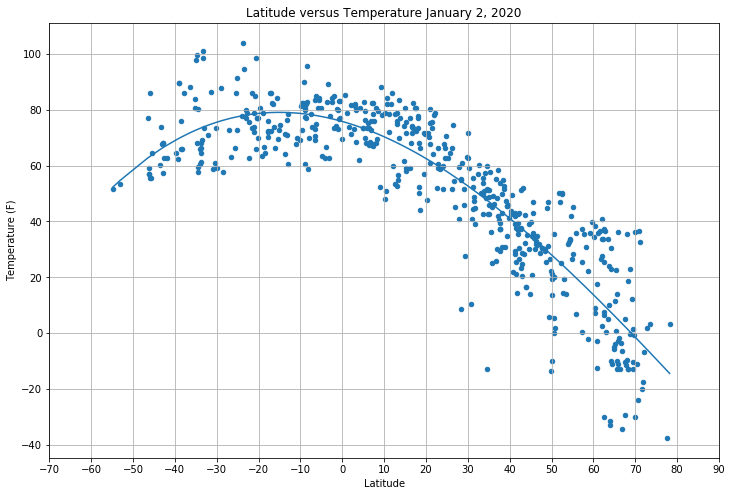

In [12]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="Temp_F")
weather_df.set_index("lat_dummy", inplace = True)
weather_df.trendline.sort_index(ascending = False).plot(ax=ax)
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Temperature (F)", fontsize=10 )
ax.set_title("Latitude versus Temperature January 2, 2020", fontsize = 12)
ax.set_xlim([-70, 70])
plt.xticks([-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig("Lat_versus_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

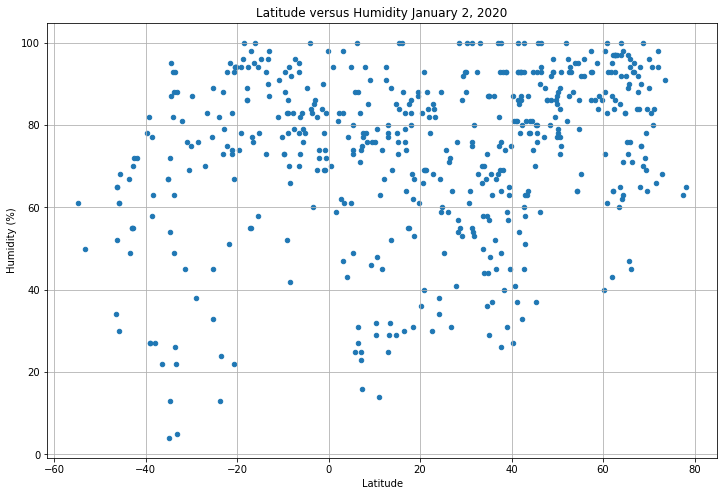

In [16]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="humidity")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Humidity (%)", fontsize=10 )
ax.set_title("Latitude versus Humidity January 2, 2020", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig("Lat_versus_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

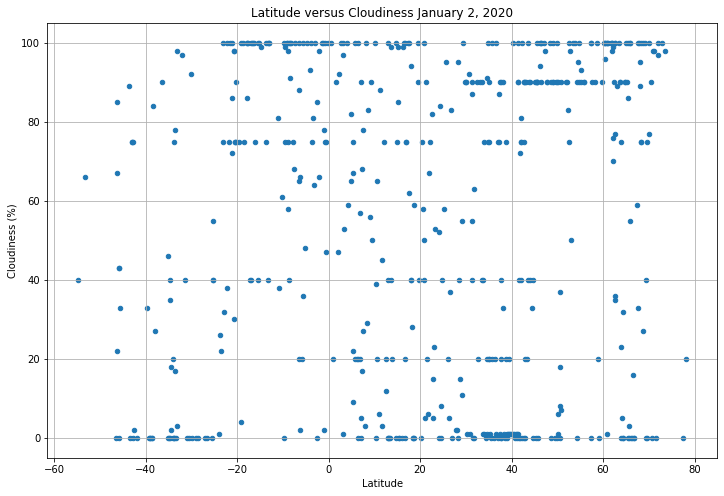

In [17]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="clouds_percent")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Cloudiness (%)", fontsize=10 )
ax.set_title("Latitude versus Cloudiness January 2, 2020", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig("Lat_versus_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

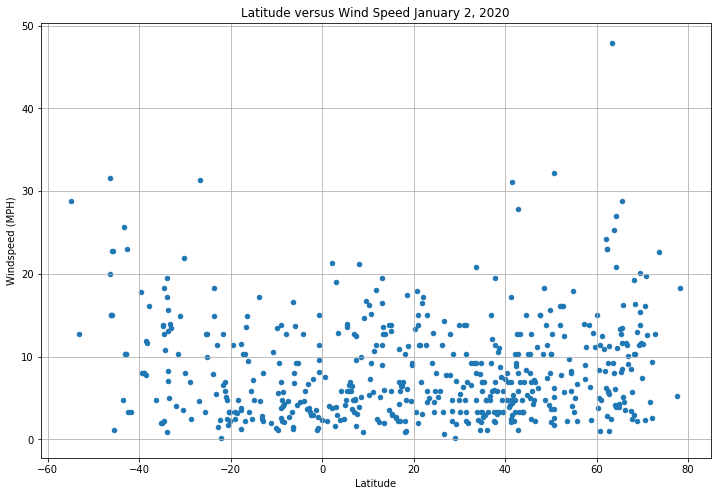

In [18]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="wind_speed_mph")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Windspeed (MPH)", fontsize=10 )
ax.set_title("Latitude versus Wind Speed January 2, 2020", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig("Lat_versus_Windspeed.png")
plt.show()